<a href="https://colab.research.google.com/github/hunie-son/hunie-son.github.io/blob/main/EE425_Homework_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import multivariate_normal

import math
from scipy import stats

import pandas as pd
import math 
import time

## Homework 3 Q1 

### Data Generation (Ref.Optimization_Intro.ipynb)

In [ ]:
#Data Initialized

"""
n= number of data
d= number of features
phi = "fraction of samples that are from class 0"


X: matrix of feature (n x d)
y: class labels (n x 1) where each entry is either 0 or 1
"""

n = 20

n_train = n
n_test = (int)(n/5)


d = 100
mu_0 = 2*np.ones((d,1))
mu_1 = -2*np.ones((d,1))
sigma = 1 *np.eye(d)

phi =0.5
#var_co = np.diag(np.arange(d)+1)

#print(mu_x1.shape)
#print(var_co.shape)

In [ ]:
def generate_data_classification(n, d, mu_0, mu_1, sigma, phi):
   
    bern_idx = np.random.rand(n, 1) #samples from unifrom random distribution (it is between 0,1)
    y = 1 * (bern_idx >= phi) #this is a vector of size m, each entry is 0,1
    
    #this is a vector of size m, each entry is 0,1
    '''
    for ii in range(n):
        if(y[ii] == 0):
            X = np.random.multivariate_normal(mu_0, sigma, n)
        else:
            X = np.random.multivariate_normal(mu_1, sigma, n)
    '''
    X = np.zeros((n, d))
    #print(X.shape)
    for ii in range(n):
        if (y[ii] == 0):
            xtmp = sigma @ np.random.randn(d, 1) + mu_0
        else:
            xtmp = sigma @ np.random.randn(d,1) + mu_1
        
        #print(X[ii:ii + 1, :].shape)
        #print(xtmp.T.shape)
        X[ii:ii + 1, :] = xtmp.T

    return X, y #_train, X_test #, noise, noise_test

In [ ]:
X_train,y_train = generate_data_classification(n_train, d, mu_0, mu_1, sigma, phi)
X_test, y_test = generate_data_classification(n_test, d, mu_0, mu_1, sigma, phi)

print(X_train.shape)


(20, 100)


### Plot the data

In [ ]:
def plot_data(X, y, n):
    X_zero = np.array([np.array(X[ii,:]) for ii in range(n) if y[ii] == 0])
    X_one = np.array([np.array(X[ii,:]) for ii in range(n) if y[ii] == 1])
    
    plt.figure(figsize=(6,6))
    plt.scatter(X_zero[:,0], X_zero[:, 1], color='red', marker='v')
    plt.scatter(X_one[:,0], X_one[:, 1], color='blue', marker='*')
    plt.show()

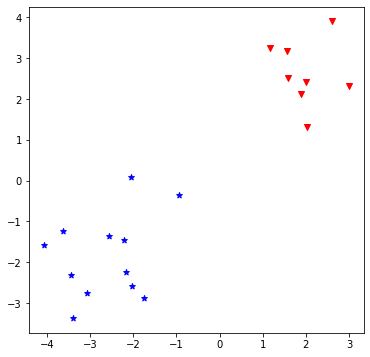

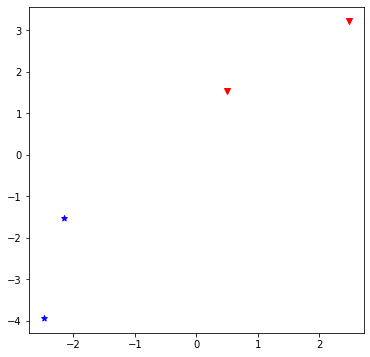

In [ ]:
plot_data(X_train,y_train,n_train)
plot_data(X_test,y_test,n_test)

## Homework 3 Q2 & Q3


### Logistic Regression


In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
def Hypothesis(X, t):
    z = np.matmul(X, t.T)
    return sigmoid(z)

In [ ]:
def neg_log_cost(theta, X, y):
    """
    X is feature matrix
    y is class label
    theta is "hyperplane"
    """
    #print(theta)
    #theta = np.mat(theta).T
    #print(theta.shape)
    
    cost_eval = 0
    m, n = X.shape
    #print(X.shape)
    #print(m)
    
   # print(theta.shape)
    
    for ii in range(m):
        xtmp = X[ii:ii+1, :]
        htheta_xtmp = sigmoid(np.squeeze(xtmp).dot(np.squeeze(theta))) #h_{theta}(x)
        #print(htheta_xtmp.shape)
        cost_eval -= y[ii] * np.log(htheta_xtmp + np.finfo(float).eps) + (1 - y[ii]) * np.log(1 - htheta_xtmp + np.finfo(float).eps)
    #print(cost_eval)
    return 1/m * cost_eval 


In [ ]:
#theta_test = np.arange(0,100,1)
theta_test = np.random.randn(d,1)
#print(theta_test.shape)

In [ ]:
def gradient_descent_log(X, y, theta_init, max_iter=1000, step_size = 1e-2):
    theta_list = [theta_init]
    m, n = X.shape
    #print(X.shape)
    for _ in range(max_iter):
        grad = 0
        for ii in range(m):
            xtmp = X[ii:ii+1, :]
           
            htheta_xtmp = sigmoid(np.squeeze(xtmp).dot(np.squeeze(theta_init)))
            grad -= (y[ii] - htheta_xtmp) * xtmp.T
            
        theta_new  = theta_init - step_size * grad / m
        theta_init = theta_new
        #theta -= step_size * grad / m
        theta_list.append(theta_new) 
        
    #print(np.mat(theta_list).shape)
    return np.squeeze(np.array(theta_list))

In [ ]:
def error_vals(X, y, theta_list):
    max_iter = theta_list.shape[0]
    err = []
    for ii in range(max_iter):
        err_tmp = neg_log_cost(theta_list[ii], X, y)
        err.append(err_tmp)
    return err

(20, 100)
(501, 100)


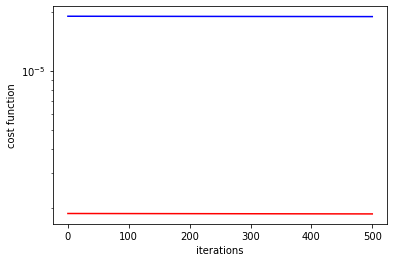

In [ ]:
max_iter = 500
step_size = 1e-2
#print(n)
#theta_list = gradient_descent_log(X_train, y_train, np.random.randn(n,1), max_iter, step_size)
theta_list = gradient_descent_log(X_train, y_train, theta_test, max_iter, step_size)
print(X_train.shape)
print(theta_list.shape)
H= Hypothesis(X_train, theta_list)
#print(H)

cost_decay = error_vals(X_train, y_train, theta_list)
cost_decay_test = error_vals(X_test, y_test, theta_list)

plt.plot(cost_decay, 'r',cost_decay_test,'b')
plt.yscale("log")
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.show()

### Gaussian Discriminant Analysis(GDA) model

In [ ]:
def fit_gda(x_train, y_train):
    m = y_train.shape[0] # Number of training example
    #Reshapeing the training set
    x_train = x_train.reshape(m, -1)
    input_feature = x_train.shape[1] 
    # Number of input feature. In our case it's 100
    #print(input_feature)
    class_label = len(np.unique(y_train.reshape(-1))) 
    # Number of class. In our case its 2.
    # Start everything with zero first.
    # Mean for each class. Each row contains an individual class. And each of the class input is 4 dimenstional
    
    mu = np.zeros((class_label, input_feature))
    # Each row will conatain the covariance matrix of each class.
    # The covariance matrix is a square symettric matrix.
    # It indicates how each of the input feature varies with each other.
    sigma = np.diag(np.arange(100)+1)
    
    # Prior probability of each class.
    # Its the measure of knowing the likelihood of any class before seeing the input data.
    phi = np.zeros(class_label)
    

    for label in range(class_label):
       
        # Seperate all the training data for a single class
        indices = (y_train == label)
        
        
        indices= indices.reshape(-1)
        phi[label] = float(np.sum(y_train)) / m
        
        mu[label] = np.mean(x_train[indices, :], axis=0)
        # Instead of writting the equation we used numpy covariance function. 
        # sigma[label] = np.cov(x_train[indices, :], rowvar=0)
    
    return phi, mu, sigma

In [ ]:
def multivariate_normal_test(mean, cov):
    var_co = np.diag(np.arange(100)+1)
    print(var_co)
    
    return np.random.multivariate_normal(mean, cov)

In [ ]:
def error_vals_GDA(X_test, y_test, predic_val):
    max_iter = np.shape(predic_val)
    max_iter=int(max_iter[0])
    err = []
    
    for ii in range(max_iter):
        err_tmp = neg_log_cost(predic_val[ii], X_test, y_test)
        err.append(err_tmp)
    return err

In [ ]:
def predict(x_tests, phi, mu, sigma):
    # flatten the training data
    x_tests = x_tests.reshape(x_tests.shape[0], -1)
    #print('-----')
    #print(x_tests)
    #print('-----')
    class_label = mu.shape[0] # Number of label we have in our case it's k = 2
    scores = np.zeros((x_tests.shape[0], class_label))  # Initially we set the each class probability to zero.
    predic_val=[]
    
    for label in range(class_label): # We will calculate the probability for each of the class.
        # normal_distribution_prob.logpdf Will give us the log value of the PDF that we just mentioned above.
        normal_distribution_prob = multivariate_normal(mean=mu[label], cov=sigma)
        
        # x_test can have multiple test data we will calculate the probability of each of the test data
        for i, x_test in enumerate(x_tests):
            scores[i, label] = np.log(phi[label]) + normal_distribution_prob.logpdf(x_test)
            predic_data = np.argmax(scores[i, label])
            predic_val.append(predic_data)
            
    #print(scores)
    predictions = np.argmax(scores, axis=1)
    return predictions, predic_val

In [ ]:
phi, mu, sigma = fit_gda(X_train, y_train)


y_predict, predic_val = predict(X_test, phi, mu, sigma)
error= error_vals_GDA(X_test, y_test, predic_val)


#print(error)

score = f1_score(y_test, y_predict, average="weighted")

print("f1 score of our model: ", score)

f1 score of our model:  1.0


## Homework 3 Q4


### Acutal Data testing


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import gzip

# Used for Confusion Matrix
from sklearn import metrics
#import seaborn as sns

# Used for Loading MNIST
from struct import unpack

%matplotlib inline

In [ ]:
#!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
#!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
#!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
#!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

In [ ]:
#!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
#!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

In [ ]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Get metadata for images
    image_size = 28
    num_images = 60000
    num_images_test = 10000
    
    images.read(16)
    
    buf_train_image= images.read(image_size * image_size * num_images)
    data_train_image = np.frombuffer(buf_train_image, dtype=np.uint8).astype(np.float32)
    data_train_image = data_train_image.reshape(num_images, image_size, image_size, 1)
    y = [] 
    
    labels.read(8)
    for i in range(num_images):   
        buf = labels.read(1)
        labels_tmp = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        y.append(labels_tmp[0] /9)
    
    y = np.array(y)
    X = []
    
    for i in data_train_image:
        xi = np.asarray(i).squeeze()
        X.append(xi.flatten())
    
    X = np.array(X)
    X = X / 255.0
    
    return X,y

In [ ]:
def loadmnist_test(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [ ]:
train_img_x, train_lbl_y = loadmnist_test('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test_img, test_lbl = loadmnist_test('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

In [ ]:
def define_the_theta(a,bias=1.0):
    t = list(map(lambda x: 0.0, range(a)))
    return np.array(t)

theta_mnist = define_the_theta(len(train_img_x[0]))

### (1) Logistic Regression

In [ ]:
theta_list_mnist = gradient_descent_log(train_img_x, train_lbl_y, theta_mnist, max_iter, step_size)
#print(X_train.shape)
#print(theta_list.shape)
#H= Hypothesis(X_train, theta_list)
#print(H)

cost_decay_mnist = error_vals(train_img_x, train_lbl_y, theta_list_mnist)
#cost_decay_test = error_vals(X_test, y_test, theta_list_mnist)
print(cost_decay_mnist)
plt.plot(cost_decay_mnist, 'r')
plt.yscale("log")
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.show()

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def Hypothesis(x, t):
    z = np.matmul(x, t)
    return sigmoid(z)

hyp = Hypothesis(X,theta)
#print(hyp)
#print(hyp.shape)

M = len(X)

def cost_function(x, y, t,m):
    h = Hypothesis(x, t)
    left_cost = -y * np.log(h)
    right_cost = (1.0-y) * np.log(1.0-h)
    cost = left_cost - right_cost
    cost = cost.sum() / m
    return cost

first_cost = cost_function(X,y,theta,M)
print(first_cost)

def update_weights(x, y, t, lr, m):
    h = Hypothesis(x, t)
    gradient = np.matmul(x.T,h - y)
    gradient /= m
    gradient *= lr
    t -= gradient
    return t
    
def train(x, y, t, lr, iters,m):
    cost_history = []
    for i in range(iters):
        t = update_weights(x, y, t, lr,m)
        cost = cost_function(x, y, t,m)
        cost_history.append(cost)
    return t, cost_history

newt, history = train(X,y,theta,0.01, 1000,M)